# Analyzing Bird Migration Patterns with GPS Data
---

Bird migration is a remarkable natural phenomenon that has long captivated the attention of researchers and enthusiasts alike. Birds migrate for various reasons, including better feeding opportunities, escaping harsh weather conditions, and finding suitable breeding grounds. Some bird species undertake astonishingly long journeys during migration, covering thousands of miles across continents. The `Arctic Tern` holds the distinction of being one of the longest migrating species, traveling from its Arctic breeding grounds to the Antarctica and back each year.

For many bird species, migration is not just a seasonal activity but a way of lie. Their survival, breeding success and overall ecology are closely intertwined with their migratory behavior.

This case study capitalizes on the wealth of GPS data to delve into the captivating realm of bird migration. By manipulating, examining and visualizing the collected GPS data, the goal is to shed light on the intricate patterns that govern the migratory journey of birds.

### Dataset
The data for this case study comes from the LifeWatch INBO project. It uses a small data set that consists of migration data for three gulls named Eric, Nico and Sanne.

## Task Description
---

The goal is to analyze and visualize the flight patterns of different bird species during their migration journeys. Using GPS tracking data collected from individual birds, the project aims to uncover insights into their flight behaviors, altitudes, and speeds.

**1. Data Exploration**
- Explore the dataset to understand it's structure, variables and available information.

**2. Data Preprocessing**
- Cleaning the data by handling missing values
- Organizing data into meaningful categories for analysis

**3. Flight Pattern Analysis**
- Calculating daily mean speed and altitude for each bird

**4. Data Visualization**
- Map the flight routes of the birds using the Folium library to illustrate their migration
- Generate plots to visualize daily mean speed and altitude

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
relative_path = "./"

In [4]:
file_loc = os.path.join(relative_path, "bird_tracking.csv")

In [5]:
data_df = pd.read_csv(file_loc,index_col = False)

In [6]:
data_df = data_df.drop(['Unnamed: 0'],axis=1)

In [7]:
data_df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


The dataset comprises a total of 61920 rows and 8 columns, encompassing variables such as `direction`, `latitude` and `speed_2d` among others.

In [8]:
data_df.shape

(61920, 8)

## Visualizing Data
---

In this task, the focus is on generating a standard two-dimensional plot that visualizes the flight trajectory of a single bird. The plot will depict the coordinates of latitude and longitude corresponding to the bird's movement.

Latitude and Longitude are inherently spherical coordinates, the representation of which in a two-dimensional plot introduces distortions due to the Earth's curved surface. This becomes particularly evident when visualizing flight paths that span a considerable spatial range.

In [9]:
ind_Eric = data_df["bird_name"] == "Eric"

In [10]:
long_Eric = data_df.longitude[ind_Eric]

lat_Eric = data_df.latitude[ind_Eric]

Examining the coordinates for the bird `Eric`, the indices associated with the bird are extracted from the dataset. These indices are stored in the variable named `ind_Eric`.

The longitudinal and latitudinal data corresponding to Eric's flight trajectory are seperately stored in `long_Eric` and `lat_Eric`.

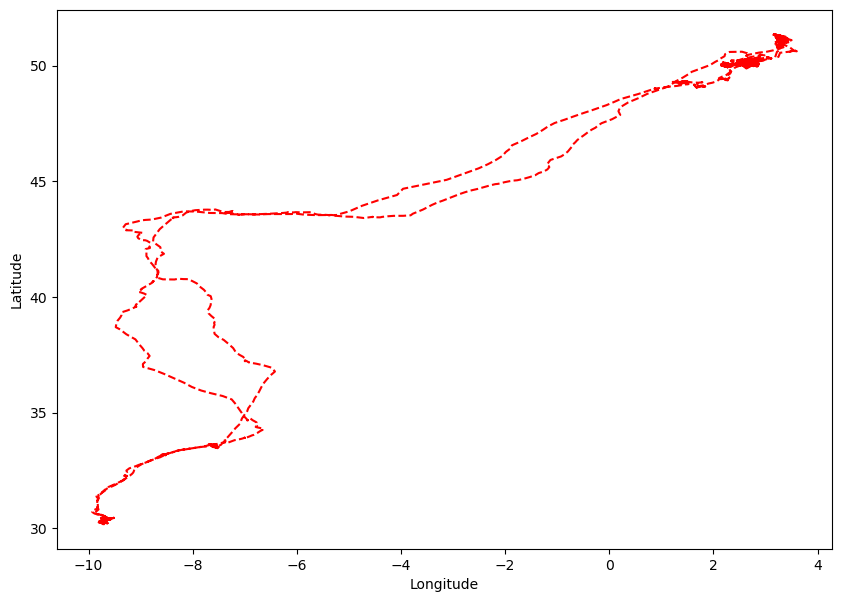

In [11]:
plt.figure(figsize = (10,7));
plt.plot(long_Eric,lat_Eric,'r--');
plt.xlabel('Longitude');
plt.ylabel('Latitude');

Subsequently, the upcoming task involves plotting the flight trajectories of all three birds in a consolidated plot.

Using the `.unique` method to extract the distinct bird names, the code iterates through these names to acquire their corresponding indices This process enables the retrieval of longitudinal and latitudinal data for all birds, which is then plotted together.

In [12]:
birdnames = pd.unique(data_df.bird_name)

birdnames

array(['Eric', 'Nico', 'Sanne'], dtype=object)

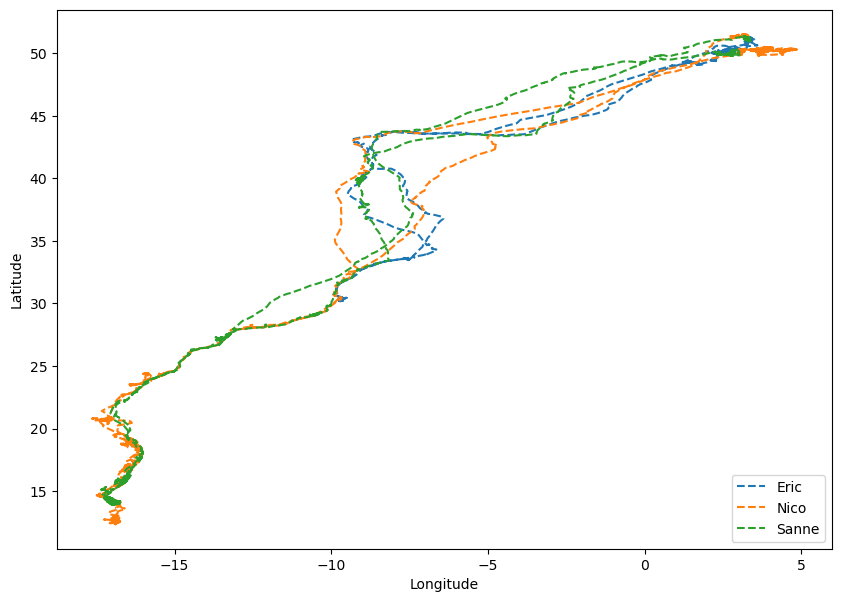

In [13]:
plt.figure(figsize = (10,7))

for bird_name in birdnames:
    
    ind = data_df.bird_name == bird_name
    long = data_df.longitude[ind]
    lat = data_df.latitude[ind]
    plt.plot(long,lat,'--',label=bird_name)
    
plt.xlabel("Longitude");
plt.ylabel("Latitude");
plt.legend(loc = "lower right");

The flight patterns of these three birds exhibit a notable degree of similarity.

However, it can be observed that Nico and Sanne tend to explore more southerly regions compared to Eric's flight trajectory.

## Examining Flight Speed
---

The dataset includes estimations of two-dimensional speeds for the birds. These speeds indicate their flying velocities on a 2D plane, which serves as a local approximation of the curved surface of the Earth.

In [14]:
speed_Eric = data_df["speed_2d"][ind_Eric]

The `speed_2d` data, which represents the two dimensional speed, is stored for Eric in `speed_Eric`.

In [16]:
speed_Eric[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

The `isnan` function from NumPy can be employed to determine whether an array contains any non-zero numbers.

By combining it with the `any` method, you can inquire if any of the values in the array are `NaN`. If the answer is `True`, it signifies the presence of at least one `NaN` in the array.

In [17]:
np.isnan(speed_Eric).any()

True

Since the `isnan` function produces an array containing `True` and `False` values, this allows for summation, where `True` is treated as `1` and `False` as `0` during the computation.

In [18]:
np.sum(np.isnan(speed_Eric))

85

There are 85 entries in Eric's speed that are not numeric.

To visualize the speed data for Eric, only the points with numeric observations are considered. This is achieved using the following steps:

- Assigning the result of `isnan` to Eric's speed variable `ind_speedEric`.

- Applying bitwise complement to `ind_speedEric`. This operation changes each instance of `True` to `False` and vice-versa.

In [19]:
ind_speedEric = np.isnan(speed_Eric)

In [20]:
np.array(~ind_speedEric)

array([ True,  True,  True, ...,  True,  True,  True])

The variable `ind_speedEric` holds the output of the `isnan` function. In this context, `True` signifies that a specific value is `nan` while `False` indicates that it is not.

Consequently, the bitwise complement of `ind_speedEric`, denoted by `~ind_speedEric`, consists of values where `True` signifies that a particular value is `non nan`, while `False` indicates that is is a `nan` value.

In [21]:
speed_median = np.median(np.array(speed_Eric[~ind_speedEric]))

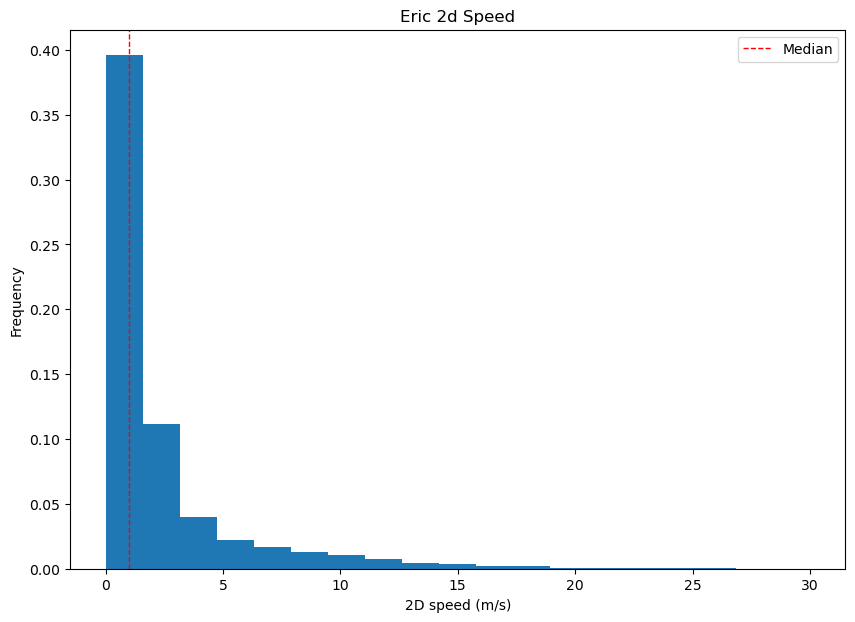

In [22]:
# creating the figure
plt.figure(figsize=(10,7))

# plotting the numeric values for Eric's speed
plt.hist(speed_Eric[~ind_speedEric],bins=np.linspace(0,30,20),density=True);
plt.xlabel("2D speed (m/s)");

# plotting the median speed
plt.axvline(speed_median,color='red',linestyle='dashed', linewidth=1,label='Median');
plt.ylabel('Frequency');
plt.legend();
plt.title("Eric 2d Speed");

## Using Datetime
---

Timestamped events frequently arise in various contexts. The possibilitiy of performing arithmetical operations involving dates and timestamps allows for calculations of time intervals between distinct observations.

Python offers the `datetime` module which is useful in dealing with a wide range of date and time-related tasks.

In [23]:
data_df['date_time'][:10]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
5    2013-08-15 02:47:38+00
6    2013-08-15 03:02:33+00
7    2013-08-15 03:17:27+00
8    2013-08-15 03:32:35+00
9    2013-08-15 03:47:48+00
Name: date_time, dtype: object

The date attribute of the dataset is represented in the format of `year, month, day`.

All entries within the `date_time` column are stored as strings. In order to perform operations on these entries, they must be converted into `datetime` objects.

In [24]:
import datetime

- The first code block uses the `datetime` module to call the `.today()` method. This method returns a `datetime` object that represents the current date and time.

- In the second code block, the variable `time1` is assigned the value of the `datetime` object returned by the `.today()` method. The function `type()` is then used to determine the type of `time1` object. 

- In the third block of code, the variable `time2` is assigned the value of another `.today()` method. Finally, the time difference between `time2` and `time1` is calculated using subtraction. The result is a `timedelta` object that represents the diffence betweem two `datetime` objects in terms of days, seconds and microseconds.

In [25]:
# block 1
datetime.datetime.today()

datetime.datetime(2023, 8, 24, 14, 33, 16, 831251)

In [26]:
# block 2
time1 = datetime.datetime.today()
print(type(time1))

<class 'datetime.datetime'>


In [27]:
# block 3
time2 = datetime.datetime.today()

## printing the 'timedelta' object
## as string, showing the time difference
## in terms of days, hours, minutes, and seconds
print(time2 - time1)

## evaluating the `timedelta` object 
time2 - time1


0:00:31.670776


datetime.timedelta(seconds=31, microseconds=670776)

To calculate the time duration between any two observatopms om pir dataset, it is necessary to initially convert the timestamps from the `str` type to `datetime` objects.

In [28]:
# value of datetime attribute for 
# the first entry in dataset
data_df['date_time'][0]

'2013-08-15 00:18:08+00'

The notation `+00` corresponds to Coordinated Universal Time (UTC) which denotes a time zone offset in hours.

Within the provided dataset, all the offsets are set to 0, implying that they will not be taken into consideration in subsequent operations.

In [29]:
data_df['date_time'][0][:-3]

'2013-08-15 00:18:08'

The `strptime` function serves the purpose of converting a string into a `datetime` object. 

It requires two arguments: the first being the input string to be converted, and the second a string that defines the formatting of the input string. This allows the function to correctly interpret the string's components and create the appropriate `datetime` object.

In [30]:
date_str = data_df.date_time[0][:-3]

print("Here is date time string: {}".format(date_str))

datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

Here is date time string: 2013-08-15 00:18:08


datetime.datetime(2013, 8, 15, 0, 18, 8)

The output is a datetime object with the following attributes:

* Year: 2013
* Month: 8 (August)
* Date: 15
* Hour: 0
* Minute: 18
* Second: 8

Using the following script helps in iterating through each individual row within the dataset and generate the corresponding `datetime` object from the `date_time` attribute.

In [31]:
timestamps = []

for i in range(len(data_df)):
    str_date = data_df["date_time"].iloc[i][:-3]
    timestamps.append(datetime.datetime.strptime(str_date, "%Y-%m-%d %H:%M:%S"))

In [32]:
# extracting the first ten elements 
# from the list

timestamps[:10]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48)]

In [33]:
# difference between the timestamp of 12th observation
# and the timestamp of the first observation

timestamps[11] - timestamps[0]

datetime.timedelta(seconds=14432)

The following step is creating a pandas `Series` object and populating it with the elements from the `timestamps` list. This helps in incluing the Series as an additional column within the existing dataframe.

In [34]:
data_df["timestamps"] = pd.Series(timestamps, index = data_df.index)

In [35]:
data_df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


It is possible to generate a list with the intention of tracking the elapsed time since the beginning of data collection. This involves extracting the timestamps specific to Erc and saving them in the `times` list.

Each element in the list is used to compute the time difference between a given timestamp and initial time, which corresponds to the first element in the `times` list. A list comprehension gets the work done.

In [36]:
# extracting timestamps data for Eric
times_Eric = data_df['timestamps'][data_df['bird_name'] == "Eric"]

# calculating the time difference between
# times_Eric[:] and times_Eric[0]
elapsed_time_Eric = [time - times_Eric[0] for time in times_Eric]

# printing the timedelta between
# final observation timestamp and initial timestamp
print(elapsed_time_Eric[-1])

258 days 23:33:21


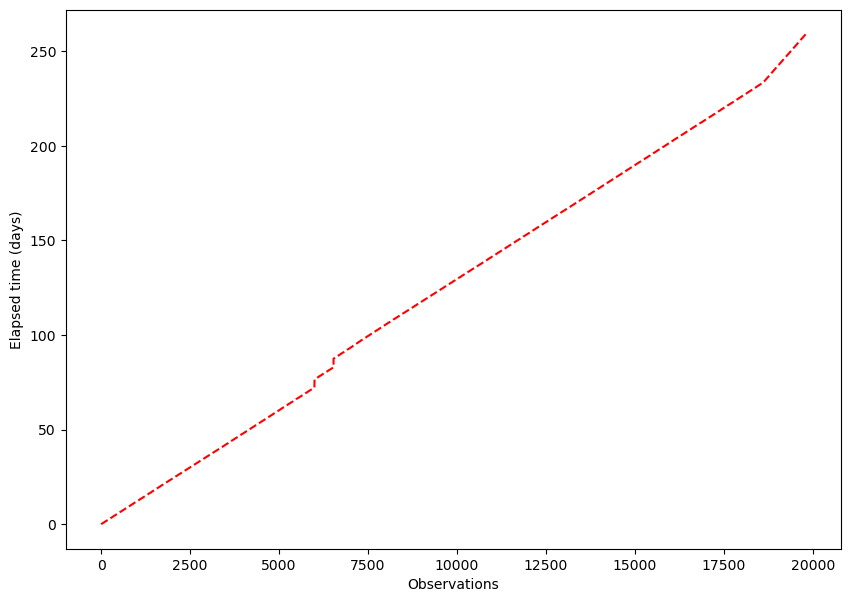

In [37]:
plt.figure(figsize = (10,7))
plt.plot(np.array(elapsed_time_Eric) / datetime.timedelta(days=1),'r--')
plt.xlabel("Observations")
plt.ylabel("Elapsed time (days)");

Upon examining the plot, a relatively straight line is seen. If the time interval between any two successive observations were consistently identical for all observations, a perfectly straight line would be observed. However, the plot showcases a few noticeable jumps, indicating the presence of observations that exhibit larger time intervals compared to other obsevations in the dataset.

## Calculating Daily Mean Speed
---

The subsequent objective is to generate a plot in which the y-axis represents the mean daily speed, and the x-axis represents time measured in days.

Since the dataset contains timestamps that are unevenly spaced, the initial point on the left corresponds to our observation number 0. All time measurements are relative to this 0th observation.

Analyzing the initial few points will likely correspond to day 0. The aim is to accumulate the indices for all observations falling within day 0. Once the timestamps transistion to day 1, the mean velocity over the collected observations for that day will be calculated. This process continues as indices for each new day is gathered.

In [38]:
elapsed_days = np.array(elapsed_time_Eric) / datetime.timedelta(days=1)

elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [39]:
# variable to check if we have hit the next day
next_day = 1

# list to keep track of indices of data points
inds = []

# list storing the daily mean speed of Eric
daily_mean_speed = []

for (the_index,the_time) in enumerate(elapsed_days):
    
    # collecting indices if we haven't 
    # reached the next day
    if the_time < next_day:
        
        inds.append(the_index)

    # next day reached
    else:
        
        # extracting speed for a particular day
        speed_data = data_df['speed_2d'][inds]
        
        # computing the mean and appending it to 
        # the list daily_mean_speed
        daily_mean_speed.append(np.mean(speed_data))
        
        # next day is increased by 1
        next_day += 1
        # list of indices is emptied
        inds = []
        

- Converting `daily_mean_speed` list into a NumPy array named `speed_array`

- Using `isnan` function to create a Boolean array `speed_ind`, where `True` represenst the positions in `speed_array` that have `NaN` values

- Using the boolean indexing with `~speed_ind`, the `speed_array` is filtered to exclude the positions with `NaN` values

- Median of the cleaned `speed_array` is calculated using `np.median()`

In [40]:
speed_array = np.array(daily_mean_speed)
speed_ind = np.isnan(speed_array)
speed_array = speed_array[~speed_ind]

print("Median: {}".format(np.median(speed_array)))

Median: 2.071156405887064


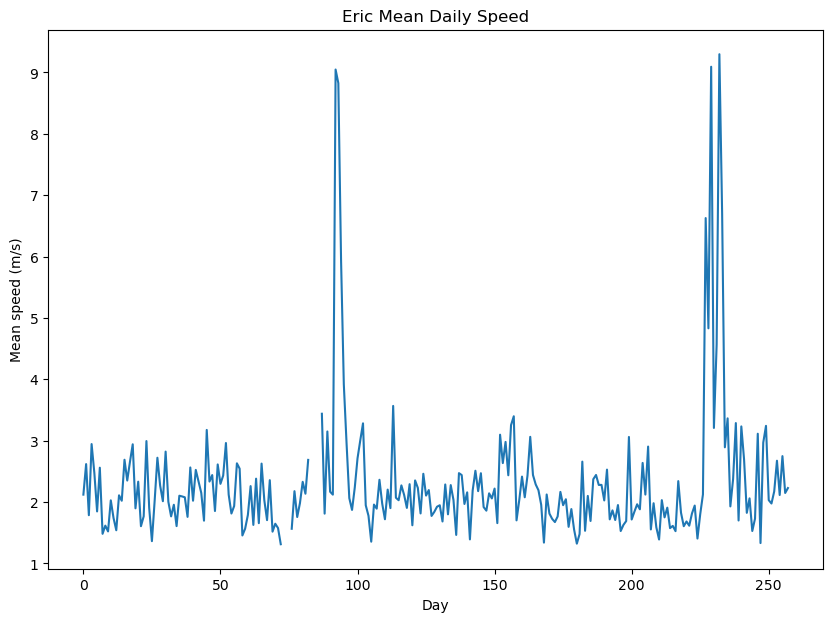

In [41]:
plt.figure(figsize = (10,7))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.title("Eric Mean Daily Speed");

The plot shows that Eric's average speed remains consistently at 3 m/s or lower for the majority of the time. There are noticeable spikes in average speed occurring around day 95 and day 230. During these specific time intervals, Eric's average speed increases significantly, reaching upto 9 m/s. These spikes coincide with Eric's migration periods, indicating his accelerated movement during these phases.

## Cartopy Library
---

Cartopy is a Python library designed to help cartographic tasks by offering a comprehensive set of tools for map creation and visualization. It simplifies the process of generating maps and working with geospatial data within Python.

In [42]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [43]:
birdnames

array(['Eric', 'Nico', 'Sanne'], dtype=object)

The objective is to extract the rows from the data frame that correspond to a particular bird's longitudinal and latitude.

To achieve this plot, a specific coordinate reference system (CRS) transformation known as `Mercator` is used. An axis is established using the `plt.axes` function, and an extend is defined for it.

Looking at the flight trajectories superimposed on top of a map gives much more insights into the migratory patterns of these birds.

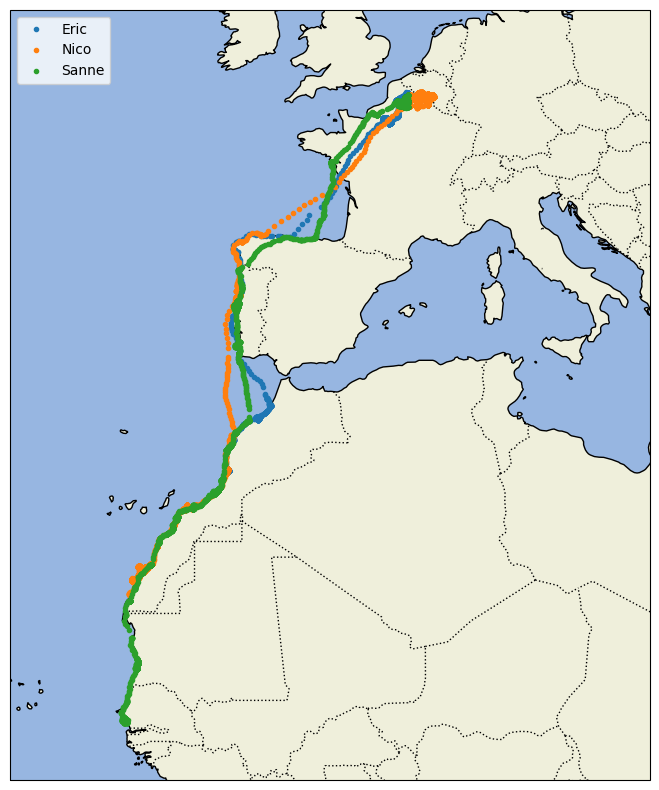

In [44]:
proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0,20.0,52.0,10.0))

# adding features to map

# adding `land` feature to the map
ax.add_feature(cfeature.LAND)
# adding 'ocean' feature to the map
ax.add_feature(cfeature.OCEAN)
# adding 'coastline' feature to the map
ax.add_feature(cfeature.COASTLINE)
# adding 'border' feature to the map
ax.add_feature(cfeature.BORDERS, linestyle = ":")

for name in birdnames:
    bird_index = data_df['bird_name'] == name
    bird_long = data_df['longitude'][bird_index][0:10000]
    bird_lat = data_df['latitude'][bird_index][0:10000]
    ax.plot(bird_long,bird_lat,'.',label=name, transform=ccrs.Geodetic())
    
plt.legend(loc="upper left");    

### Folium
---

`Folium` is a robust Python library that enables the creation of dynamic and interactive maps directly within the project notebook. With Folium, dynamic geographic data, such as bird migration paths and points of interest can be overlaid onto interactive maps. The inclusion of Folium adds a layer of geographical insight and engagement, facilitating a more comprehensive understanding of the intricate migration behaviors of avian species. 

- Importing `folium` library

- Calculating the center point of the provided coordinates. This point is used as the initial focus of the map

- Creating a new map `mymap` using the `folium.Map` function. The map's location is set to the calculated center point and the initial zoom level is adjusted using the argument `zoom_start`

- For each set of coordinates, a marker is added to the map using `folium.Marker` function

In [45]:
import folium

In [99]:
latitude = [30,51]
longitude = [-9.9, 3.6]

center_latitude = sum(latitude) / len(latitude)
center_longitude = sum(longitude) / len(longitude)

# calculating the map center
map_center = [center_latitude, center_longitude]

# creating the map
# location is set to `map_center`
# initial zoom level is set to 5
mymap = folium.Map(location = map_center, zoom_start = 5)


for lat, long in zip(latitude, longitude):
    folium.Marker(location = [lat,long], popup = f"Latitude: {lat} | Longitude: {long}").add_to(mymap)

# saving the map to HTML file
mymap.save("coordinates_map.html")

![coordinates_map_ss.png](coordinates_map_ss.png)

Using the Folium map visualization, we can see the cities pivotal to the bird migration routes. The birds start off from Belgium, tracing a path along the coastal regions of Spain and Portugal. They navigate over to Africa and continue along the coastal fringes of Morocco. 

## Tracking Flight Patterns
---

The focus in this case study is analyzing flight patterns exhibited by each of the three birds within the dataset. The intention is to organize the flight patterns by both bird and date, subsequently generating plots that illustrate the average altitude for these grouped patterns.

In [85]:
birddata = pd.read_csv(file_loc, index_col=0)

In [86]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Task 1
---

- Calculating the mean `speed_2d` for each bird

In [139]:
# Dictionary to store the mean speed for each bird
mean_speeds = {}

# Dictionary to store the mean altitude for each bird
mean_altitudes = {}

for name in birdnames:
    data = birddata[birddata['bird_name'] == name]
    bird_speed = np.mean(data['speed_2d'])
    bird_altitude = np.mean(data['altitude'])
    mean_speeds[name] = bird_speed
    mean_altitudes[name] = bird_altitude



In [140]:
print("Mean speed of birds: {}".format(mean_speeds))

print("Mean altitude of birds: {}".format(mean_altitudes))

Mean speed of birds: {'Eric': 2.3005445907278466, 'Nico': 2.9087263541396617, 'Sanne': 2.4504341163584806}
Mean altitude of birds: {'Eric': 60.249406415761555, 'Nico': 67.90047819705507, 'Sanne': 29.159921919634357}


### Task 2
---

The goal of this task is to aggregate flight times by date and compute the average altitude within each day.

- Converting the `date_time` column to the `pd.datetime` format

- Storing the resulting date values in a new column named `date` within the `birddata` dataframe

In [89]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata['date_time'] = pd.to_datetime(birddata['date_time'])

date_time_values = birddata['date_time']
date_time_values.head()

0   2013-08-15 00:18:08+00:00
1   2013-08-15 00:48:07+00:00
2   2013-08-15 01:17:58+00:00
3   2013-08-15 01:47:51+00:00
4   2013-08-15 02:17:42+00:00
Name: date_time, dtype: datetime64[ns, UTC]

In [90]:
# creating the list to contain 
# 'pd.datetime' format values
date_value = []

for i in range(len(date_time_values)):
    date_value.append(date_time_values.iloc[i].date())

# creating a new column of day of observation
birddata["date"] = date_value


The code block below iterates through each unique date in `date_set`, extracting the corresponding altitude values for that date using boolean indexing, calculating the meean altitude for the day and storing it in `mean_altitude_perday` dictionary.

The `altitude_value` list is cleared after each iteration to prepare for next date.

In [74]:
mean_altitude_perday = {}

date_set = set(birddata['date'])
altitude_values = []

for date in date_set:

    altitude_values = birddata.altitude[birddata['date'] == date]
    mean_altitude_perday[str(date)] = np.mean(altitude_values)

    altitude_values = []

### Task 3
---

Calculating the mean altitude for each bird and date combination.


In [105]:
eric_data = birddata[birddata['bird_name'] == 'Eric']
sanne_data = birddata[birddata['bird_name'] == 'Sanne']
nico_data = birddata[birddata['bird_name'] == 'Nico']

The following lines of code take the individual datasets `eric_data`, `sanne_data`, and `nico_data` and group their entries by date, resulting in three separate DataFrames `eric_date_grouped`, `sanne_date_grouped`, and `nico_date_grouped` where the data entries are organized by the dates they correspond to.

In [121]:
eric_date_grouped = pd.DataFrame(eric_data.groupby(['date']))
sanne_date_grouped = pd.DataFrame(sanne_data.groupby(['date']))
nico_date_grouped = pd.DataFrame(nico_data.groupby(['date']))

Dictionary comprehensions are used to calculate the mean altitude of bird migrations for each dataset on a per-date basis. The date is used as the key in the dictionaries, and the calculated mean altitude is associated with each date. This helps in analyzing altitude trends during bird migrations over time.

In [107]:
eric_mean_altitude = {str(eric_date_grouped[0][k]): eric_date_grouped[1][k]['altitude'].mean() for k in range(len(eric_date_grouped))}

sanne_mean_altitude = {str(sanne_date_grouped[0][k]): sanne_date_grouped[1][k]['altitude'].mean() for k in range(len(sanne_date_grouped))}

nico_mean_altitude = {str(nico_date_grouped[0][k]): nico_date_grouped[1][k]['altitude'].mean() for k in range(len(nico_date_grouped))}



### Task 4
---

The aim of this task is to compute the average speed for each bird and day. After calculating the average speeds, a visualization will be created showing the average speeds and altitude for each bird.

- Calculating the mean speed for each bird and date combination
- Plotting the daily mean speed and altitude


The mean speed for each bird on a daily basis is calculated by dictionary comprehension. The date is used as the key in the dictionaries, and the calculated mean speeds is associated with each date. This helps in analyzing speed trends during migrations over time.

In [109]:
eric_mean_speed = {str(eric_date_grouped[0][k]): eric_date_grouped[1][k]['speed_2d'].mean() for k in range(len(eric_date_grouped))}

sanne_mean_speed = {str(sanne_date_grouped[0][k]): sanne_date_grouped[1][k]['speed_2d'].mean() for k in range(len(sanne_date_grouped))}

nico_mean_speed = {str(nico_date_grouped[0][k]): nico_date_grouped[1][k]['speed_2d'].mean() for k in range(len(nico_date_grouped))}




In [114]:
import matplotlib.pyplot as plt


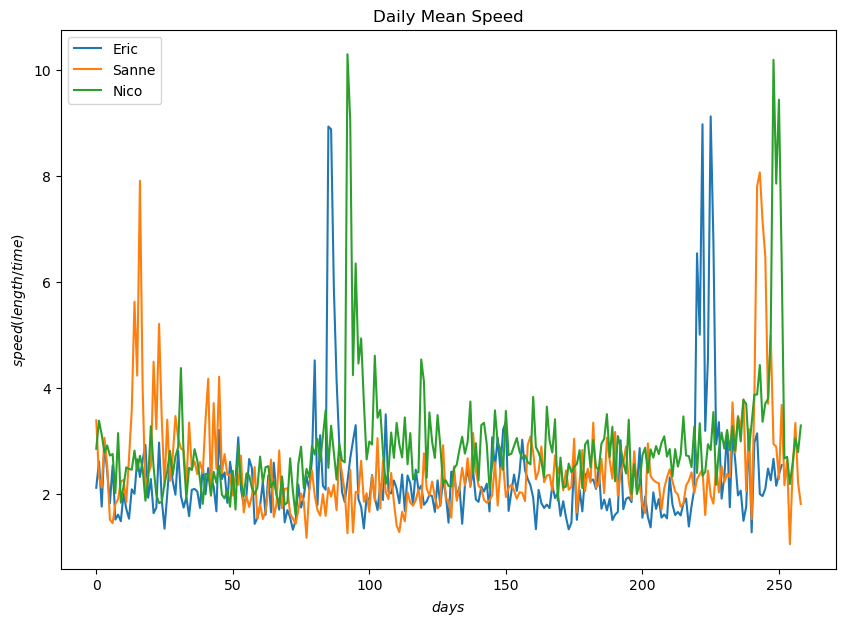

In [134]:

eric_daily_speed  = pd.Series(eric_mean_speed.values())
sanne_daily_speed = pd.Series(sanne_mean_speed.values())
nico_daily_speed  = pd.Series(nico_mean_speed.values())

plt.figure(figsize=(10, 7))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend()
plt.title("Daily Mean Speed")
plt.xlabel("$days$")
plt.ylabel("$speed (length/time)$")
plt.show()

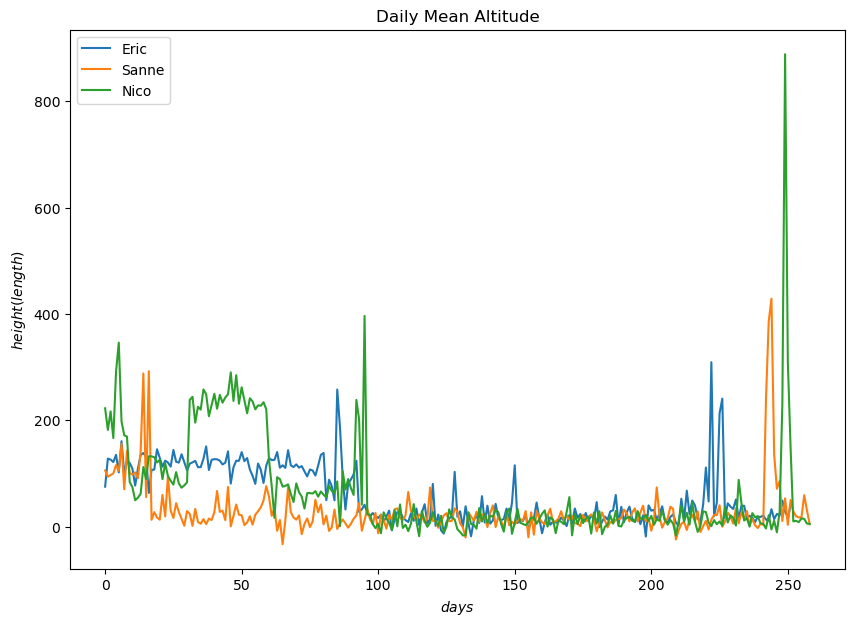

In [128]:

eric_daily_alt  = pd.Series(eric_mean_altitude.values())
sanne_daily_alt = pd.Series(sanne_mean_altitude.values())
nico_daily_alt  = pd.Series(nico_mean_altitude.values())

plt.figure(figsize=(10, 7))
eric_daily_alt.plot(label="Eric")
sanne_daily_alt.plot(label="Sanne")
nico_daily_alt.plot(label="Nico")
plt.legend()
plt.title("Daily Mean Altitude")
plt.xlabel("$days$")
plt.ylabel("$height (length)$")
plt.show()

The depicted graphs of daily mean speed and altitude offers insights into the flight behavior of the birds. The visualizations highlight significant trends that correspond to specific phases of the birds' migration journey. The periods of elevated altitde and increased speed directly correlate with their period of migrationm indicating their movement between different geographical regions. 

- Nico flies at higher altitudes more frequently than other birds and achieves the highest altitude during migration.

- Nico also consistently maintains a higher daily mean speed compared to the other birds

These observations are consisted with the data analysed where Nico had both higher mean speed and higher mean altitude.

---